# Exploração de Dados do Titanic

Este notebook foca exclusivamente na exploração e visualização dos dados do Titanic.

## Sobre o Problema

O naufrágio do Titanic é um dos desastres marítimos mais conhecidos da história. O objetivo deste estudo é analisar os dados dos passageiros do Titanic para entender quais fatores influenciaram a sobrevivência. O conjunto de dados contém informações como classe, sexo, idade, tarifa, local de embarque, entre outros. O desafio é prever quem sobreviveu ao desastre com base nessas informações.

Além disso, é importante observar que o conjunto de dados apresenta **desbalanceamento** em algumas features, como a proporção de sobreviventes, distribuição entre classes e gêneros, o que pode impactar a análise e a performance dos modelos preditivos.

## 1. Importação das Bibliotecas

In [1]:
# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# Configuração para exibir mais colunas
pd.set_option('display.max_columns', None)

## 2. Carregamento dos Dados

In [2]:
# URL dos dados do Titanic
train_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Carregando os dados
df = pd.read_csv(train_url)

# Exibindo as primeiras linhas do dataset
print(f'Dimensões do dataset: {df.shape}')
df.head()

Dimensões do dataset: (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## 3. Exploração Inicial dos Dados

In [3]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Vamos dar uma olhada:

Acima está um resumo dos nossos dados contidos em um `DataFrame` do `Pandas`. Pense em um `DataFrame` como uma versão turbinada do Python para o fluxo de trabalho de uma tabela do Excel. Como você pode ver, o resumo traz bastante informação. Primeiro, ele nos mostra que temos 891 observações, ou passageiros, para analisar aqui:
    
    Int64Index: 891 entradas, 0 a 890

Depois, ele mostra todas as colunas do `DataFrame`. Cada coluna nos diz algo sobre cada uma das nossas observações, como `nome`, `sexo` ou `idade`. Essas colunas são chamadas de features do nosso conjunto de dados. Você pode considerar as palavras coluna e feature como intercambiáveis neste notebook.

Após cada feature, ele mostra quantos valores ela contém. Enquanto a maioria das features tem dados completos para todas as observações, como a feature `survived`:

    survived    891  valores não nulos

algumas estão com informações faltantes, como a feature `age`:

    age         714  valores não nulos

Esses valores ausentes são representados como `NaN`s.

### Lidando com valores ausentes:
As features `ticket` e `cabin` têm muitos valores ausentes e, portanto, não agregam muito valor à nossa análise. Para lidar com isso, vamos removê-las do dataframe para preservar a integridade do nosso conjunto de dados.

Para isso, usamos esta linha de código para remover as features completamente:

    df = df.drop(['ticket','cabin'], axis=1) 

Enquanto esta linha remove os valores `NaN` de todas as colunas/features restantes:
   
    df = df.dropna()
     
Agora temos um conjunto de dados limpo e pronto para análise. Como `.dropna()` remove uma observação mesmo que ela tenha apenas 1 `NaN` em uma das features, a maior parte do nosso conjunto de dados seria removida se não tivéssemos excluído antes as features `ticket` e `cabin`.

In [4]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

As colunas 'Ticket' e 'Cabin' são removidas devido ao alto número de valores ausentes. Em seguida, todas as linhas com valores faltantes em qualquer coluna restante são excluídas, resultando em um conjunto de dados mais limpo para análise.

In [5]:
# Verificando valores ausentes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Porcentagem (%)': missing_percentage.round(2)
})

missing_data.sort_values('Porcentagem (%)', ascending=False)

Valores Ausentes  Porcentagem (%)
PassengerId                 0              0.0
Survived                    0              0.0
Pclass                      0              0.0
Name                        0              0.0
Sex                         0              0.0
Age                         0              0.0
SibSp                       0              0.0
Parch                       0              0.0
Fare                        0              0.0
Embarked                    0              0.0

Esta célula calcula e exibe a quantidade e a porcentagem de valores ausentes em cada coluna do DataFrame após a limpeza. O resultado confirma que não há mais valores faltantes nas colunas analisadas.

In [6]:
# especifica os parâmetros dos nossos gráficos
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# nos permite plotar muitos gráficos de formatos diferentes juntos
ax1 = plt.subplot2grid((2,3),(0,0))
# plota um gráfico de barras daqueles que sobreviveram vs. aqueles que não.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# isso ajusta bem as margens no matplotlib para lidar com um bug recente 1.3.1
ax1.set_xlim(-1, 2)
# coloca um título no nosso gráfico
plt.title("Distribuição de Sobrevivência, (1 = Sobreviveu)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# define o rótulo do eixo y
plt.ylabel("Idade")
# formata o estilo da linha de grade dos nossos gráficos                          
plt.grid(visible=True, which='major', axis='y')
plt.title("Sobrevivência por Idade,  (1 = Sobreviveu)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Distribuição de Classe")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plota uma estimativa de densidade de kernel do subconjunto da idade dos passageiros da 1ª classe
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plota um rótulo de eixo
plt.xlabel("Idade")    
plt.title("Distribuição de Idade dentro das classes")
# define nossa legenda para nosso gráfico.
plt.legend(('1ª Classe', '2ª Classe','3ª Classe'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# especifica os parâmetros dos nossos gráficos
plt.title("Passageiros por local de embarque")

Text(0.5, 1.0, 'Passageiros por local de embarque')

1. Distribuição de Sobrevivência, (1 = Sobreviveu)
Este gráfico mostra a contagem absoluta de passageiros que sobreviveram e que não sobreviveram. Podemos observar que um número significativamente maior de passageiros não sobreviveu ao desastre.
2. Sobrevivência por Idade, (1 = Sobreviveu)
O gráfico de dispersão relaciona a idade dos passageiros com a sobrevivência. A alta densidade de pontos em todas as faixas etárias para o grupo que "Não Sobreviveu" (0) é visível. Para o grupo de "Sobreviveu" (1), podemos notar uma concentração de pontos em idades mais jovens, sugerindo que crianças podem ter tido uma maior chance de sobrevivência.
3. Distribuição de Classe
Este gráfico ilustra a distribuição de passageiros entre as três classes. Fica claro que a grande maioria dos passageiros viajava na 3ª classe, seguida pela 1ª e, por último, a 2ª classe.
4. Distribuição de Idade dentro das classes
Este gráfico compara a distribuição das idades entre as três classes.
A 1ª Classe (curva azul) apresenta um pico em torno dos 30-40 anos, indicando uma população de passageiros mais madura e estabelecida.
A 2ª Classe (curva laranja) tem uma distribuição semelhante, mas com um pico ligeiramente mais jovem.
A 3ª Classe (curva verde) mostra uma concentração muito maior de passageiros jovens, com um pico acentuado entre 20 e 30 anos.
5. Passageiros por local de embarque
O gráfico demonstra que a vasta maioria dos passageiros embarcou em Southampton ('S'), com um número consideravelmente menor embarcando em Cherbourg ('C') e Queenstown ('Q').



Text(0.5, 1.0, 'Análise de Sobrevivência (1 = Sobreviveu, 0 = Morreu)')

<Figure size 600x400 with 0 Axes>

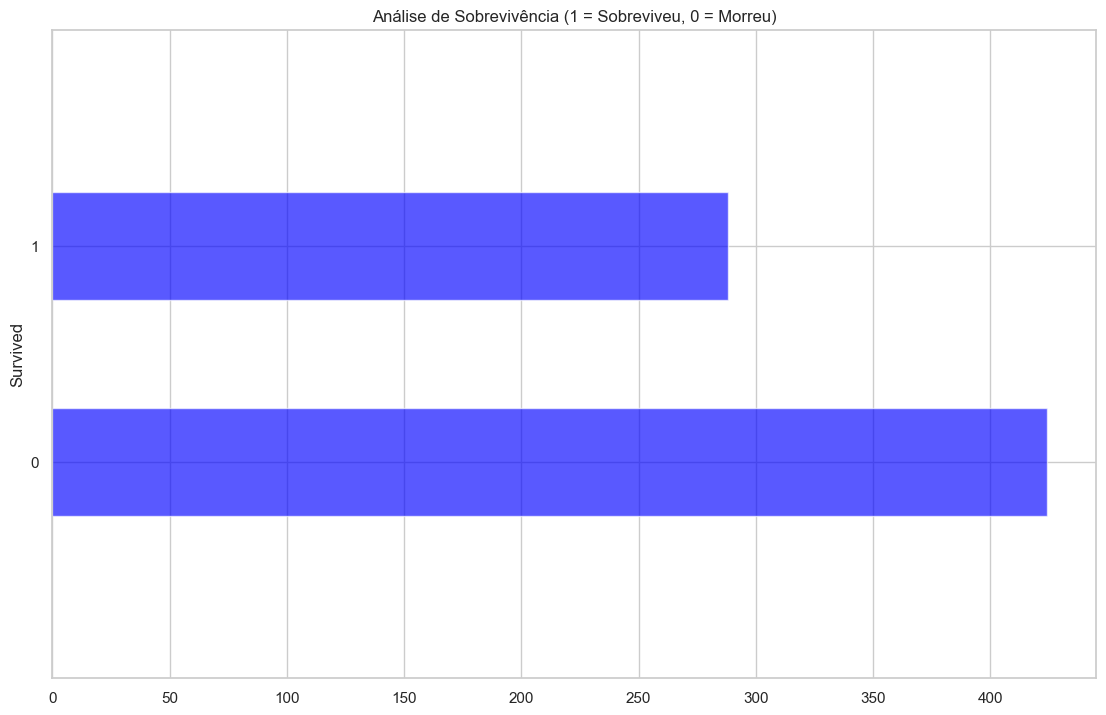

In [7]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Análise de Sobrevivência (1 = Sobreviveu, 0 = Morreu)")

(-1.0, 2.0)

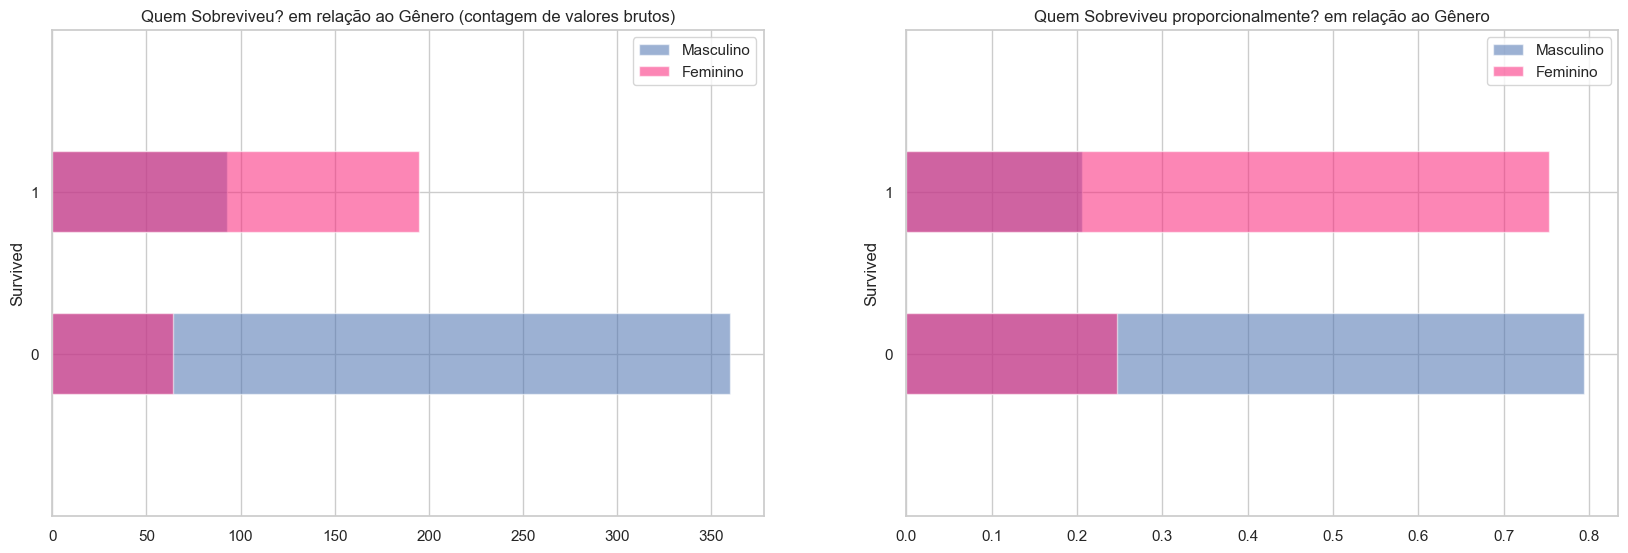

In [8]:
fig = plt.figure(figsize=(18,6))

#cria um gráfico de dois subconjuntos, masculino e feminino, da variável de sobreviventes.
#Depois disso, chamamos value_counts() para que possa ser facilmente plotado como um gráfico de barras. 
#'barh' é apenas um gráfico de barras horizontal
df_masculino = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_feminino = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_masculino.plot(kind='barh',label='Masculino', alpha=0.55)
df_feminino.plot(kind='barh', color='#FA2379',label='Feminino', alpha=0.55)
plt.title("Quem Sobreviveu? em relação ao Gênero (contagem de valores brutos)"); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#ajusta o gráfico para exibir as proporções de sobrevivência por gênero
ax2 = fig.add_subplot(122)
(df_masculino/float(df_masculino.sum())).plot(kind='barh',label='Masculino', alpha=0.55)  
(df_feminino/float(df_feminino.sum())).plot(kind='barh', color='#FA2379',label='Feminino', alpha=0.55)
plt.title("Quem Sobreviveu proporcionalmente? em relação ao Gênero"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

Gráfico 1: Quem Sobreviveu? (Contagem de Valores Brutos)
 Este gráfico mostra a contagem absoluta de homens e mulheres que sobreviveram e não sobreviveram. Podemos observar que, em números brutos, muito mais homens não sobreviveram em comparação com as mulheres. Ao mesmo tempo, o número de mulheres que sobreviveram é consideravelmente maior que o de homens sobreviventes. Embora houvesse mais homens a bordo, este gráfico por si só pode ser enganoso se não considerarmos as proporções.
Gráfico 2: Quem Sobreviveu Proporcionalmente?
Este gráfico normaliza os dados, mostrando a proporção de sobreviventes e não sobreviventes dentro de cada gênero. A história aqui fica muito mais clara:
Feminino: Uma grande maioria das mulheres a bordo sobreviveu (cerca de 75%).
Masculino: A grande maioria dos homens a bordo não sobreviveu (cerca de 80%).

A comparação entre os dois gráficos é poderosa. Enquanto o primeiro mostra que o maior grupo de vítimas era de homens, o segundo revela que ser mulher dava uma chance de sobrevivência drasticamente maior. Isso confirma a hipótese de que a política de "mulheres e crianças primeiro" foi um fator determinante para a sobrevivência no desastre do Titanic.

Aqui fica claro que, embora mais homens tenham morrido e sobrevivido em números absolutos, as mulheres tiveram uma taxa de sobrevivência proporcionalmente maior (~25%) do que os homens (~20%).


Será que conseguimos capturar mais estrutura usando a Pclass? Aqui vamos agrupar as classes como classe mais baixa ou qualquer uma das classes altas (classes 1 - 2). 3 é a classe mais baixa. Vamos detalhar por gênero e por classe em que estavam viajando.

Após estabelecermos que o gênero foi um fator crucial para a sobrevivência, vamos adicionar outra camada de análise: a classe social. A hipótese aqui é que o status socioeconômico também desempenhou um papel determinante, possivelmente modificando a regra de "mulheres e crianças primeiro".
O código a seguir gera quatro gráficos de barras, segmentando a população em quatro grupos distintos para uma comparação detalhada:

Mulheres de classe alta (1ª e 2ª).

Mulheres de classe baixa (3ª).

Homens de classe baixa (3ª).

Homens de classe alta (1ª e 2ª).

In [9]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# com base no código anterior, aqui criamos um subconjunto adicional dentro do subconjunto de gênero
# que criamos para a variável de sobreviventes. Eu sei, são muitos subconjuntos. Depois disso, chamamos
# value_counts() para que possa ser facilmente plotado como um gráfico de barras. isso é repetido para cada
# par de gênero e classe.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='feminino, classe alta', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Sobreviveu", "Morreu"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Quem Sobreviveu? em relação ao Gênero e Classe"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='feminino, classe baixa', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Morreu","Sobreviveu"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='masculino, classe baixa',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Morreu","Sobreviveu"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='masculino, classe alta', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Morreu","Sobreviveu"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Gráfico 1: Mulheres de Classe Alta (1ª e 2ª)
Mostra que a grande maioria das mulheres de classes mais altas sobreviveu. A barra de "Sobreviveu" é muito maior que a de "Morreu", indicando uma taxa de sobrevivência extremamente alta para este grupo.

Gráfico 2: Mulheres de Classe Baixa (3ª)
Para as mulheres da 3ª classe, a situação se inverte. Embora a chance de sobrevivência ainda fosse razoável (as barras têm tamanhos próximos), a contagem de mortes é ligeiramente superior à de sobreviventes. Comparado ao primeiro gráfico, fica claro que a classe social era um fator de grande impacto mesmo entre as mulheres.

Gráfico 3: Homens de Classe Baixa (3ª)
Este gráfico revela o cenário mais sombrio. A esmagadora maioria dos homens da 3ª classe não sobreviveu. A barra de "Morreu" é drasticamente maior, mostrando que este foi o grupo com a menor chance de salvação.

Gráfico 4: Homens de Classe Alta (1ª e 2ª)
Embora a maioria dos homens de classe alta também não tenha sobrevivido (seguindo a tendência geral masculina), a proporção de sobreviventes é visivelmente maior quando comparada à dos homens de classe baixa. Ser de uma classe social mais elevada aumentou as chances de sobrevivência de um homem, ainda que elas permanecessem baixas no geral.

Fica evidente que a regra "mulheres e crianças primeiro" foi fortemente influenciada pela classe social. Ser mulher aumentava suas chances, mas ser uma mulher de classe alta as tornava muito maiores. Da mesma forma, ser homem diminuía suas chances, mas ser um homem de classe baixa as tornava quase nulas.

Para entender os fatores que levaram à sobrevivência no desastre do Titanic, podemos construir nossa análise em etapas, partindo de uma visão geral para uma mais detalhada. O conjunto de gráficos a seguir conta essa história em três fases, revelando como a combinação de diferentes variáveis, como gênero e classe social, influenciou o destino dos passageiros.

In [10]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Etapa 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Etapa 1")

# Etapa 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Masculino')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Feminino')
ax2.set_xlim(-1, 2)
plt.title("Etapa 2 \nQuem Sobreviveu? em relação ao Gênero."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Masculino')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Feminino')
ax3.set_xlim(-1,2)
plt.title("Quem Sobreviveu proporcionalmente?"); plt.legend(loc='best')


# Etapa 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='feminino, classe alta', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Sobreviveu", "Morreu"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Quem Sobreviveu? em relação ao Gênero e Classe"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='feminino, classe baixa', color='pink', alpha=a)
ax5.set_xticklabels(["Morreu","Sobreviveu"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='masculino, classe baixa',color='lightblue', alpha=a)
ax6.set_xticklabels(["Morreu","Sobreviveu"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='masculino, classe alta', alpha=a, color='steelblue')
ax7.set_xticklabels(["Morreu","Sobreviveu"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')


Etapa 2: Introduzindo o Fator Gênero
- Esta etapa divide a análise por gênero.
- O primeiro gráfico da linha mostra a contagem bruta de sobreviventes por gênero. Vemos que o maior número de mortos era de homens.
- O segundo gráfico mostra a proporção, ou seja, a taxa de sobrevivência dentro de cada gênero.

A análise proporcional revela a verdadeira história. Enquanto a maioria esmagadora dos homens morreu (cerca de 80%), a grande maioria das mulheres sobreviveu (cerca de 75%). A regra "mulheres e crianças primeiro" parece ter sido um fator decisivo. 

Etapa 3: Adicionando a Camada de Classe Social
- A etapa final segmenta os grupos de gênero pela classe social (dividida em "alta", para 1ª e 2ª classes, e "baixa", para a 3ª classe).

Análise: Esta visão detalhada mostra como a classe social influenciou a regra de gênero:
- Mulheres de Classe Alta: Tiveram uma taxa de sobrevivência altíssima. Quase todas sobreviveram.
- Mulheres de Classe Baixa: A sorte já não foi a mesma. Para elas, a contagem de mortes superou a de sobreviventes.
- Homens de Classe Baixa: Representam o grupo com o pior prognóstico. A taxa de mortalidade foi massiva.
- Homens de Classe Alta: Embora a maioria também tenha morrido, suas chances de sobrevivência foram consideravelmente maiores do que as dos homens da 3ª classe.

Essa abordagem em etapas nos permite construir uma compreensão clara e robusta dos dados. Partimos de um fato geral (a maioria morreu), adicionamos uma variável-chave (gênero), que revelou uma forte tendência, e, por fim, refinamos a análise com outra variável (classe), que mostrou as nuances dessa tendência.
A conclusão é que a sobrevivência no Titanic não dependeu de um único fator, mas de uma interseção entre gênero e classe social, criando uma hierarquia de chances bem definida.